In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio import SeqIO
import numpy as np
import pandas as pd
import os
import glob

In [2]:
%cd ~/storage/metagenome/bact_4x/new_con/diamond/
!ls

/mnt/storage/metagenome/bact_4x/new_con/diamond
14.0.faa	26.0.faa_dbcan	29.1.faa	46.1.faa_dbcan	left
14.0.faa_dbcan	26.1.faa	29.1.faa_dbcan	46.faa.flat	right
14.1.faa	26.1.faa_dbcan	29.faa.flat	46.faa.gdx	temp.57557
14.1.faa_dbcan	26.faa.flat	29.faa.gdx	46_nice.tsv	tmp1
14.faa.flat	26.faa.gdx	29_nice.tsv	46_prokka	tmp2
14.faa.gdx	26_nice.tsv	29_prokka	Hotpep
14_nice.tsv	26_prokka	46.0.faa	con
14_prokka	29.0.faa	46.0.faa_dbcan	db
26.0.faa	29.0.faa_dbcan	46.1.faa	fake_otu


### Prokka import

Import common info about contig and gene id 

#### NOT RUN

gbk SeqIO based parser \
This parser didnt work correctly. Too low number of seqs. 

In [3]:
# for f in glob.glob('./*faa_dbcan/overview.txt'):
#     df = pd.read_csv(f'{f}', sep='\t')
#     files_l.append(df)
files_in_dir=['./14_prokka/PROKKA_06282021.gbk', './26_prokka/PROKKA_06282021.gbk', './29_prokka/PROKKA_06282021.gbk', './46_prokka/PROKKA_06282021.gbk']
files_l = []
for f in files_in_dir:
    prokka_read_id = []
    prokka_gene_annotation = []
    prokka_gene_id = []
    for record in SeqIO.parse(f'{f}', "genbank"):
        for f in record.features:
            if f.type == "CDS" and "gene" in f.qualifiers:
                gene = f.qualifiers["gene"][0]
                prokka_read_id.append(record.id)
                prokka_gene_annotation.append(f.qualifiers["gene"][0])
                prokka_gene_id.append(f.qualifiers["locus_tag"][0])
    df = pd.DataFrame(list(zip(prokka_read_id, prokka_gene_id, prokka_gene_annotation)),
                columns=['contig', 'Gene_ID', 'Annotation'])
    files_l.append(df)
df = pd.concat(files_l, keys=['14', '26', '29', '46'])
df.reset_index(inplace=True)
community = df['level_0'].str.split('.',expand=True)[0]
df.insert(0, 'community', community)
df_prokka = df.drop(columns=['level_0', 'level_1'])
df_prokka

,community,contig,Gene_ID,Annotation
0,14,c427,MEBDDFFA_00005,amaA_1
1,14,c427,MEBDDFFA_00007,hipO_1
2,14,c427,MEBDDFFA_00009,secA_1
3,14,c427,MEBDDFFA_00010,secA_2
4,14,c427,MEBDDFFA_00011,secA_3
...,...,...,...,...
165413,46,c68,AAKEFBLG_121937,arnT_10
165414,46,c68,AAKEFBLG_121939,rgtE_11
165415,46,c68,AAKEFBLG_121943,chaB_2
165416,46,c68,AAKEFBLG_121951,bphC_5


gff grep based parser

In [4]:
files_in_dir=['./14_prokka/PROKKA_06282021.gff', './26_prokka/PROKKA_06282021.gff', './29_prokka/PROKKA_06282021.gff', './46_prokka/PROKKA_06282021.gff']
files_l = []
for f in files_in_dir:   
    !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
    df = pd.read_csv('contig_ids_temp.tsv', sep='\t',  names=['contig', 'Gene_ID'])
    community = f'{f}'.split("/")[1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
    !rm contig_ids_temp.tsv
df_ids = pd.concat(files_l)
df_ids["contig"] = df_ids["contig"].str[1:]
df_ids

,community,contig,Gene_ID
0,14,427,MEBDDFFA_00001
1,14,427,MEBDDFFA_00002
2,14,427,MEBDDFFA_00003
3,14,427,MEBDDFFA_00004
4,14,427,MEBDDFFA_00005
...,...,...,...
121953,46,68,AAKEFBLG_121954
121954,46,68,AAKEFBLG_121955
121955,46,68,AAKEFBLG_121956
121956,46,1467,AAKEFBLG_121957


In [68]:
df_ids

,community,contig,Gene_ID
0,14,427,MEBDDFFA_00001
1,14,427,MEBDDFFA_00002
2,14,427,MEBDDFFA_00003
3,14,427,MEBDDFFA_00004
4,14,427,MEBDDFFA_00005
...,...,...,...
121953,46,68,AAKEFBLG_121954
121954,46,68,AAKEFBLG_121955
121955,46,68,AAKEFBLG_121956
121956,46,1467,AAKEFBLG_121957


#### OPTIONAL

In work


In [ ]:
files_in_dir=['./14_prokka/PROKKA_06282021.gff', './26_prokka/PROKKA_06282021.gff', './29_prokka/PROKKA_06282021.gff', './46_prokka/PROKKA_06282021.gff']
files_l = []
for f in files_in_dir:   
    !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
    !f = grep -oP "product=.+\n" 
    !sed -i "s/$/\t$f/"  contig_ids_temp
    df = pd.read_csv('contig_ids_temp.tsv', sep='\t',  names=['contig', 'Gene_ID'])
    community = f'{f}'.split("/")[1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
    
    pd.read_csv
    !rm contig_ids_temp.tsv
df_ids = pd.concat(files_l)
df_ids["contig"] = df_ids["contig"].str[1:]
df_ids

In [39]:
f = './14_prokka/PROKKA_06282021.gff'
# !grep -oP "(s|c)[0-9]+\s.*ID=[A-Z]+_[0-9]+" $f | sed 's/[\t].*[\t]ID=/\t/g' > contig_ids_temp.tsv
!grep -oP "(product=.*\n" $f | head
# !paste contig_ids_temp.tsv right > contig_ids_temp.tsv
# !head contig_ids_temp

In [ ]:
!head -n 50000 ./14_prokka/PROKKA_06282021.gff | tail -n 30

In [735]:
df_prokka_wc.loc[df_prokka_wc['Gene_ID'] == 'AAKEFBLG_00264']

,community,contig,Gene_ID


In [54]:
df_prokka_wc['community'].value_counts()

NameError: name 'df_prokka_wc' is not defined

### Kraken result formatting

In [73]:
d = {"14.0":"14.0.faa",
     "14.1":"14.1.faa",
     "26.0":"26.0.faa",
     "26.1":"26.1.faa",
     "29.0":"29.0.faa",
     "29.1":"29.1.faa",
     "46.0":"46.0.faa",
     "46.1":"46.1.faa"}

In [78]:
%%bash

for file in con/kraken2_res/*tsv; do
    comm=$(basename $file | cut -c1-2)
    cat $file | cut -f2,3,6 > con/kraken2_res/$comm\_nice.tsv
#     sed -i 'g/\;[a-zA-Z\s]+group\;//i' con/kraken2_res/$comm\_nice.tsv
done;
# grep "Pseudomonas oleovorans" con/kraken2_res/*_res_kraken.tsv
# grep "Pseudomonas oleovorans" con/kraken2_res/*_nice.tsv

In [79]:
for f in glob.glob('con/kraken2_res/*_nice.tsv'):
    l_1 = []
    counter = 0
    counter2 = 0
    with open(f, 'r') as file:      
        for l in file:

            if counter > 0:
                l_1[-1] = l_1[-1] + '\n'
            counter = 0
            for i in l.split(";"):
                if (not i.endswith("group")) and (counter < 8):              
                    l_1.append(i.rstrip())
                    if counter2 == 0:
                        l_1[0] = '\t' + l_1[0]
                    counter += 1
                    counter2 += 1
    with open(f, 'w') as file:
        file.write('\t'.join(l_1) + '\n')

!head con/kraken2_res/14_nice.tsv
%rm con/kraken2_res/_n_nice.tsv

	427	926565	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1457	926565	cellular organisms	Bacteria	Bacteroidetes	Cytophagia	Cytophagales	Cytophagaceae	Sporocytophaga	Sporocytophaga myxococcoides
	1813	452637	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	768	68287	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Phyllobacteriaceae	Mesorhizobium
	1440	374	cellular organisms	Bacteria	Proteobacteria	Alphaproteobacteria	Hyphomicrobiales	Bradyrhizobiaceae	Bradyrhizobium
	897	452637	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	Opitutus	Opitutus terrae
	1041	2	cellular organisms	Bacteria
	1454	2161865	cellular organisms	Bacteria	Verrucomicrobia	Opitutae	Opitutales	Opitutaceae	unclassified Opitutaceae	Opitutaceae bacterium EW11
	608	2171623	cellular organisms	Bacteria	Actinobacteria	Actinomycetia	Micro

In [10]:
files_l = []
names = []
for f in glob.glob('./*faa_dbcan/overview.txt'):
    df = pd.read_csv(f'{f}', sep='\t')
    filename = f'{f}'.split("/")[1][:4]
    df.insert(0, 'filename', filename)
    files_l.append(df)
df = pd.concat(files_l)
df.reset_index(inplace=True)
community = df['filename'].str.split('.',expand=True)[0]
df.insert(0, 'community', community)
df_cazy = df.drop(columns=['filename', 'index'])
df_cazy.columns = ['community', 'Gene_ID', 'HMMER', 'Hotpep', 'DIAMOND', 'NumberofTools']
df_cazy


# files_l = []
# for f in glob.glob('./con/kraken2_res/*nice.tsv'):
#     df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "d" ,"Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
#     community = f'{f}'.split("/")[-1][:2]
#     df.insert(0, 'community', community)
#     files_l.append(df)
# df = pd.concat(files_l)
# df = df.drop(['zero', 'd'], axis=1)
# df

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,-,-,PL8,1
13357,46,AAKEFBLG_35246,-,-,GH2,1
13358,46,AAKEFBLG_78144,-,-,GH36,1
13359,46,AAKEFBLG_106008,-,-,CBM48+GH13_10,1


In [11]:
df_cazy

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
0,46,AAKEFBLG_00098,GT1(11-421),-,-,1
1,46,AAKEFBLG_00146,GH2(21-413),-,GH2,2
2,46,AAKEFBLG_00264,GH154(15-332),GH154(12),GH154,3
3,46,AAKEFBLG_00268,GH42(14-380),GH42(3),GH42,3
4,46,AAKEFBLG_00282,CBM67(117-293)+GH78(320-842),GH78(1)+CBM67(23),GH78,3
...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,-,-,PL8,1
13357,46,AAKEFBLG_35246,-,-,GH2,1
13358,46,AAKEFBLG_78144,-,-,GH36,1
13359,46,AAKEFBLG_106008,-,-,CBM48+GH13_10,1


In [12]:
df_cazy_f = df_cazy[df_cazy['NumberofTools'] > 1]
df_cazy_f = df_cazy_f.replace('-', value=np.nan)
# df.replace(regex={r'^ba.$': 'new'})
df_cazy_f = df_cazy_f.replace('\(.*\)', '', regex=True)
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3
...,...,...,...,...,...,...
12995,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2
12998,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2
12999,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2
13003,46,AAKEFBLG_113036,NaN,CBM6,GH2,2


In [13]:
# df_cazy_f['is_equal'] = (df_cazy_f['HMMER'] == df_cazy_f['Hotpep'])
df_cazy_f.HMMER.mode()

0    GT2_Glycos_transf_2
dtype: object

In [61]:
df_cazy_f['HMMER'].value_counts()[:10].index.tolist()

['GT2_Glycos_transf_2',
 'GT4',
 'GH3',
 'GT51',
 'GH23',
 'GH2',
 'GH103',
 'GH51',
 'GH1',
 'GH10']

#### mode

In [14]:
df_cazy_f["mode"] = df_cazy_f[['HMMER', 'Hotpep', 'DIAMOND']].T.mode().values.tolist()[0]
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
...,...,...,...,...,...,...,...
12995,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2,CBM50
12998,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2,CBM50
12999,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2,CBM50
13003,46,AAKEFBLG_113036,NaN,CBM6,GH2,2,CBM6


In [35]:
df_max = df_cazy_simple.groupby(['mode']).count().sort_values('community', ascending=False)
df_max

,community
mode,
GT2,632
GT4,510
GH3,295
GT51,287
GH2,208
GH23,207
GH0,109
GT0,109
CE4,107


In [ ]:
pd.reset_option('all')

#### create fake otu table

In [25]:
# df_cazy_f[['community','mode']].agg("mode").count()
fake_otu = df_cazy_f.groupby(['community','mode']).size().reset_index(name='counts')
fake_otu = fake_otu.pivot(index='mode', columns='community', values='counts').fillna('0')
fake_otu.to_csv('fake_otu',index=True, sep = '\t')
fake_otu
# !pwd


community,14,26,29,46
mode,,,,
AA10,3.0,3.0,2.0,1.0
AA3,13.0,12.0,6.0,16.0
AA3_2,7.0,12.0,4.0,6.0
AA4,0,0,0,1.0
AA6,1.0,1.0,3.0,3.0
...,...,...,...,...
PL6,0,0,1.0,1.0
PL8,0,0,0,16.0
PL9,2.0,0,4.0,4.0


In [40]:
fake_index = fake_otu.index.to_list()
fake_index
GH = ["GH" in item for item in fake_index]
GT = ["GT" in item for item in fake_index]


In [16]:
td = pd.read_csv("fake_otu", sep='\t')
td = td.drop_duplicates()
td.assign(f = td[['14', '26', '29', '46']].sum(axis=1)).sort_values('f', ascending=False).drop('f', axis=1)

,mode,14,26,29,46
343,GT2,134.0,167.0,136.0,195.0
358,GT4,104.0,133.0,103.0,170.0
240,GH3,48.0,79.0,77.0,91.0
362,GT51,59.0,88.0,60.0,80.0
231,GH2,40.0,44.0,51.0,73.0
...,...,...,...,...,...
283,GH5+3.2.1.4,0.0,1.0,0.0,0.0
53,CBM23+CBM27+CBM54+CBM59+GH26,0.0,0.0,0.0,1.0
281,GH48,0.0,0.0,0.0,1.0
207,GH13_33,0.0,0.0,0.0,1.0


In [845]:
sortedl = l[['count','mode']].groupby("mode").count().sort_values('count', ascending=False)
sortedl.index.tolist()

['CBM50',
 'CE10',
 'GH23',
 'GH3',
 'GT2',
 'GT4',
 'GT51',
 'GH2',
 'GT2_Glycos_transf_2',
 'CE1',
 'CE4',
 'GH0',
 'GT0']

In [861]:
liss = sortedl.index.tolist()
liss

['CBM50',
 'CE10',
 'GH23',
 'GH3',
 'GT2',
 'GT4',
 'GT51',
 'GH2',
 'GT2_Glycos_transf_2',
 'CE1',
 'CE4',
 'GH0',
 'GT0']

In [862]:
l = pd.melt(td, id_vars='mode', value_vars=['14', '26', '29', '46'], var_name='community', value_name='count')
# l = l.sort_values(by=['count'], ascending=False)[0:40]
todraw = l[l['mode'].isin(liss)]
todraw

,mode,community,count
115,CBM50,14,81.0
159,CE1,14,55.0
161,CE10,14,75.0
171,CE4,14,52.0
179,GH0,14,41.0
260,GH2,14,60.0
263,GH23,14,73.0
271,GH3,14,62.0
379,GT0,14,37.0
396,GT2,14,203.0


In [851]:
l

,mode,community,count
0,AA1,14,13.0
1,AA10,14,4.0
2,AA12,14,6.0
3,AA1_3,14,0.0
4,AA2,14,2.0
...,...,...,...
1935,PL9,46,5.0
1936,PL9_1,46,3.0
1937,PL9_2,46,1.0
1938,PL9_4,46,1.0


In [17]:
d = sns.catplot(data=todraw, hue="community",
                y = "mode", x='count', kind="bar", aspect=2,
                height=10,legend= False, orient="h")

plt.plot([1,2,3], label = 'Community')
plt.ylabel('glycosylases', fontsize = 16)
plt.xlabel('count', fontsize = 20)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 17)

NameError: name 'todraw' is not defined

In [736]:
fake_otu

community,14,26,29,46
mode,,,,
AA1,13,19,11,18
AA10,4,3,3,1
AA12,6,5,4,2
AA1_3,0,0,0,1
AA2,2,0,0,1
...,...,...,...,...
PL9,2,2,4,5
PL9_1,0,0,0,3
PL9_2,0,0,0,1


In [18]:
df_taxa = df.drop(['community', 'contig'], axis=1)
taxa_duplicates_dropped = df_taxa.drop_duplicates()
taxa_duplicates_dropped

KeyError: "['contig'] not found in axis"

In [82]:
files_l = []
for f in glob.glob('./con/kraken2_res/*nice.tsv'):
    df = pd.read_csv(f'{f}', sep='\t',  names=['zero', 'contig', "id", "d","Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"])
    community = f'{f}'.split("/")[-1][:2]
    df.insert(0, 'community', community)
    files_l.append(df)
df = pd.concat(files_l)
df_taxa = df.drop(['zero', 'd'], axis=1)
df_taxa
# taxa = df['taxa'].str.split(';',expand=True).loc[:, 1:7]
# taxa.columns = ["Kingdom", "Phylum",  "Class" ,  "Order",  "Family",  "Genus",   "Species"]
# taxa.query("Kingdom != 'Bacteria'")
# df.query("Kingdom != 'Bacteria'")


,community,contig,id,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,29,540,1883,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,29,471,2015316,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,29,109,266749,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,29,954,29313,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,29,297,1827501,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
...,...,...,...,...,...,...,...,...,...,...
1584,26,1387,935863,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,unclassified Luteimonas
1585,26,964,1736575,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
1586,26,1016,2116701,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,Mesorhizobium ephedrae
1587,26,35,356,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,NaN,NaN,NaN


In [118]:
df_taxa_ids = df_taxa.iloc[:, 2:10]
df_taxa_ids = df_taxa_ids.drop_duplicates()
df_taxa_ids

,id,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,1883,Bacteria,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN
1,2015316,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
2,266749,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Weeksellaceae,Kaistella,Kaistella jeonii
3,29313,Bacteria,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,Mycobacterium shimoidei
4,1827501,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
...,...,...,...,...,...,...,...,...
1546,716546,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota,saccharomyceta,Pezizomycotina
1547,1783232,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Erythrobacteraceae,Croceicoccus,Croceicoccus bisphenolivorans
1554,1298858,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
1557,1122183,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,Luteimonas mephitis


### 16S taxonomy -- Kraken 

#### 14 comm

16S tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 9.2 | 1 | 1 | 8.2 |
| Pseudoxanthomonas | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |

kraken tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Bosea | 1.3| 0 | 2 | 6.4|
| Opitutus terrae | 4.7 | 3 | 0 | 3 
alpha -- 456

#### 29 comm

16S tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 24.4 | 1 | 0 | 0.9 |
| Pilrellula | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |

kraken tops

|taxa | ra_left | pos_left | pos_right | ra_right |
| --- | --- | --- | --- | --- |
| Sporocytophaga | 9.2 | 1 | 1 | 8.2 |
| Pseudoxanthomonas | 8.8 | 2 | 0 | 0.52 |
| Asticcacaulis | 5.7 | 3 | 0 | 1.57 |


In [145]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 100)

taxa_allcounted = df_taxa.groupby(['community', 'id']).count().sort_values('contig', ascending=False).reset_index().iloc[:, :3].rename(columns={"contig": "count"})
taxa_allcounted = taxa_allcounted.merge(df_taxa_ids, on='id', how='left')
# taxa_allcounted.query('community == 14')
taxa_allcounted

,community,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,14,926565,156,Bacteria,Bacteroidetes,Cytophagia,Cytophagales,Cytophagaceae,Sporocytophaga,Sporocytophaga myxococcoides
1,26,935863,143,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,unclassified Luteimonas
2,46,1736675,142,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
3,46,32002,135,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Alcaligenaceae,Achromobacter,Achromobacter denitrificans
4,14,406341,122,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
5,26,1736575,119,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
6,46,1036780,103,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,Bosea robiniae
7,29,1827501,102,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
8,26,406341,101,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
9,14,452637,90,Bacteria,Verrucomicrobia,Opitutae,Opitutales,Opitutaceae,Opitutus,Opitutus terrae


In [180]:
one_comm = taxa_allcounted[taxa_allcounted['community'] == '29']
sum_count = sum(one_comm['count'])
one_comm = one_comm.assign(count = one_comm['count'] / sum_count * 100)
one_comm
# len(one_comm)

,community,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species
7,29,1827501,6.714944,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Phyllobacteriaceae,Mesorhizobium,unclassified Mesorhizobium
13,29,2135485,4.739961,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,unclassified Sphingomonas
14,29,1643450,4.608295,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
21,29,1437360,4.213298,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Bradyrhizobiaceae,Bradyrhizobium,Bradyrhizobium erythrophlei
23,29,1736675,4.147465,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Devosiaceae,Devosia,unclassified Devosia
24,29,456490,4.147465,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Cohnella,Cohnella phaseoli
33,29,2015316,3.094141,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Boseaceae,Bosea,unclassified Bosea
34,29,452637,2.896643,Bacteria,Verrucomicrobia,Opitutae,Opitutales,Opitutaceae,Opitutus,Opitutus terrae
35,29,1701910,2.896643,Bacteria,Proteobacteria,Alphaproteobacteria,Hyphomicrobiales,Rhizobiaceae,Agrobacterium,unclassified Agrobacterium
40,29,2419774,2.567479,Bacteria,Actinobacteria,Actinomycetia,Micrococcales,Microbacteriaceae,Protaetiibacter,Protaetiibacter intestinalis


In [173]:
one_comm

In [128]:
df_taxa.groupby(['community', 'Genus']).count().sort_values('contig', ascending=False)

contig   id  Kingdom  \
community Genus                                                          
26        Devosia                                    408  408      408   
46        Devosia                                    222  222      222   
          Paenibacillus                              205  205      205   
14        Devosia                                    196  196      196   
29        Devosia                                    196  196      196   
14        Bosea                                      166  166      166   
46        Achromobacter                              162  162      162   
14        Sporocytophaga                             159  159      159   
29        Bradyrhizobium                             151  151      151   
26        Luteimonas                                 149  149      149   
14        Acidovorax                                 137  137      137   
          Mesorhizobium                              136  136      136   
26        Hydrogenophaga                             135  135      135   
46        Bosea                                      122  122      122   
29        Mesorhizobium                              118  118      118   
46        Caulobacter                                112  112      112   
26        Bosea                                      108  108      108   
29        Sphingomonas                               105  105      105   
46        Pseudoxanthomonas                          104  104      104   
26        Pseudoxanthomonas                          103  103      103   
14        Opitutus                                   103  103      103   
46        Ruminiclostridium                           89   89       89   
14        Hydrogenophaga                              86   86       86   
26        Aquamicrobium                               85   85       85   
          Asticcacaulis                               83   83       83   
29        Cohnella                                    82   82       82   
46        Sphingomonas                                78   78       78   
26        Dokdonella                                  76   76       76   
14        Shinella                                    71   71       71   
          unclassified Opitutaceae                    71   71       71   
          Asticcacaulis                               68   68       68   
          Aquamicrobium                               68   68       68   
26        Mesorhizobium                               66   66       66   
46        Azospirillum                                62   62       62   
29        Variovorax                                  60   60       60   
          Microbacterium                              58   58       58   
          Opitutus                                    56   56       56   
          Bosea                                       53   53       53   
          Agrobacterium                               51   51       51   
26        Chitinophaga                                50   50       50   
          Shinella                                    49   49       49   
          Flavobacterium                              47   47       47   
46        Cohnella                                    46   46       46   
14        Methylobacterium                            40   40       40   
29        Protaetiibacter                             39   39       39   
14        Cellulomonas                                35   35       35   
          Bauldia                                     35   35       35   
29        Streptomyces                                35   35       35   
          Afipia                                      33   33       33   
          Pigmentiphaga                               32   32       32   
          Mycobacterium                               29   29       29   
14        Bradyrhizobium                              28   28       28   
46        Shinella                                    

In [919]:
df_cazy_f.duplicated(subset=['Gene_ID']).sum()


0

In [920]:
df_taxa["ID"] = df_taxa["community"].astype(str) + "_" + df_taxa["contig"].astype(str)
df_ids["ID"] = df_ids["community"].astype(str) + "_" + df_ids["contig"].astype(str)


In [697]:
df_cazy_f df_prokka_wc df_taxa

,community,level_0,level_1,contig,Gene_ID,Annotation
0,14,14,0,c427,MEBDDFFA_00005,amaA_1
1,14,14,1,c427,MEBDDFFA_00007,hipO_1
2,14,14,2,c427,MEBDDFFA_00009,secA_1
3,14,14,3,c427,MEBDDFFA_00010,secA_2
4,14,14,4,c427,MEBDDFFA_00011,secA_3
...,...,...,...,...,...,...
165413,46,46,49190,c68,AAKEFBLG_121937,arnT_10
165414,46,46,49191,c68,AAKEFBLG_121939,rgtE_11
165415,46,46,49192,c68,AAKEFBLG_121943,chaB_2
165416,46,46,49193,c68,AAKEFBLG_121951,bphC_5


In [70]:
df_cazy_f

,community,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78
5,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2
...,...,...,...,...,...,...,...
12995,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2,CBM50
12998,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2,CBM50
12999,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2,CBM50
13003,46,AAKEFBLG_113036,NaN,CBM6,GH2,2,CBM6


In [922]:
merge3.isna().sum()

community_x         0
Gene_ID             0
HMMER            4283
Hotpep           5863
DIAMOND          4769
NumberofTools       0
mode                0
community_y         0
contig_x            0
ID                  0
community           0
contig_y            0
Kingdom             9
Phylum             52
Class              91
Order             117
Family            132
Genus             181
Species           509
dtype: int64

In [48]:
merge1 = df_cazy_f.merge(df_ids, on='Gene_ID', how='left')
# merge3 = merge1.merge(df_taxa, on='ID', how='left')
merge1

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig
0,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435
1,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186
2,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186
3,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186
4,46,AAKEFBLG_00283,GH2,GH2,GH2,3,GH2,46,186
...,...,...,...,...,...,...,...,...,...
7380,46,AAKEFBLG_60620,NaN,CBM50,CBM50,2,CBM50,46,38
7381,46,AAKEFBLG_102001,NaN,CBM50,CBM50,2,CBM50,46,18
7382,46,AAKEFBLG_67159,NaN,CBM50,CBM50,2,CBM50,46,624
7383,46,AAKEFBLG_113036,NaN,CBM6,GH2,2,CBM6,46,423


In [979]:
merge3

,community_x,Gene_ID,HMMER,Hotpep,DIAMOND,NumberofTools,mode,community_y,contig_x,ID,community,contig_y,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,46,AAKEFBLG_00098,GT1,NaN,NaN,1,GT1,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
1,46,AAKEFBLG_00146,GH2,NaN,GH2,2,GH2,46,435,46_435,46,435,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
2,46,AAKEFBLG_00264,GH154,GH154,GH154,3,GH154,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
3,46,AAKEFBLG_00268,GH42,GH42,GH42,3,GH42,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
4,46,AAKEFBLG_00282,CBM67,GH78,GH78,3,GH78,46,186,46_186,46,186,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13356,46,AAKEFBLG_117026,NaN,NaN,PL8,1,PL8,46,1142,46_1142,46,1142,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,Paenibacillus paeoniae
13357,46,AAKEFBLG_35246,NaN,NaN,GH2,1,GH2,46,118,46_118,46,118,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
13358,46,AAKEFBLG_78144,NaN,NaN,GH36,1,GH36,46,1301,46_1301,46,1301,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
13359,46,AAKEFBLG_106008,NaN,NaN,CBM48+GH13_10,1,CBM48+GH13_10,46,140,46_140,46,140,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum


In [23]:
taxa = merge3.iloc[: , [6, 9, 10, 12, 13, 14, 15, 16, 17 ,18]]
merge3.iloc[: , [6, 9, 10, 12, 13, 14, 15, 16, 17 ,18]].groupby("community").count()

NameError: name 'merge3' is not defined

In [911]:
merge1['community_y'].value_counts()
merge1.isna().sum()

community_x         0
Gene_ID             0
HMMER            4283
Hotpep           5863
DIAMOND          4769
NumberofTools       0
mode                0
community_y         0
contig              0
dtype: int64

In [22]:
# fake_otu = df_cazy_f.groupby(['community','mode']).size().reset_index(name='counts')
# fake_otu = fake_otu.pivot(index='mode', columns='community', values='counts').fillna('0')
# fake_otu.to_csv('fake_otu',index=True, sep = '\t')

fake_taxa = taxa.groupby(['community','mode', 'Phylum']).size().reset_index(name='counts')
fake_taxa

NameError: name 'taxa' is not defined

In [996]:
draws3.groupby(['Phylum']).count().sort_values('community', ascending=False)

,community,mode,counts,Abditibacteriota,Actinobacteria,Armatimonadetes,Bacteroidetes,Chlamydiae,Cyanobacteria,Firmicutes,Planctomycetes,Proteobacteria,Verrucomicrobia
Phylum,,,,,,,,,,,,,
Proteobacteria,52,52,52,52,52,52,52,52,52,52,52,52,52
Actinobacteria,51,51,51,51,51,51,51,51,51,51,51,51,51
Bacteroidetes,47,47,47,47,47,47,47,47,47,47,47,47,47
Verrucomicrobia,38,38,38,38,38,38,38,38,38,38,38,38,38
Firmicutes,24,24,24,24,24,24,24,24,24,24,24,24,24
Planctomycetes,8,8,8,8,8,8,8,8,8,8,8,8,8
Cyanobacteria,2,2,2,2,2,2,2,2,2,2,2,2,2
Abditibacteriota,1,1,1,1,1,1,1,1,1,1,1,1,1
Armatimonadetes,1,1,1,1,1,1,1,1,1,1,1,1,1


In [959]:
todraw2 = fake_taxa[fake_taxa['mode'].isin(liss)]
todraw2

,community,mode,Phylum,counts
90,14,CBM50,Actinobacteria,3
91,14,CBM50,Bacteroidetes,2
92,14,CBM50,Proteobacteria,74
93,14,CBM50,Verrucomicrobia,2
129,14,CE1,Actinobacteria,5
...,...,...,...,...
2344,46,GT4,Proteobacteria,208
2345,46,GT4,Verrucomicrobia,15
2354,46,GT51,Actinobacteria,5
2355,46,GT51,Firmicutes,12


In [21]:
# fake_taxa["community"] = fake_taxa.to_numeric(fake_taxa["community"])
# fake_taxa.groupby(['Phylum']).count().sort_values('community', ascending=False)
fake_taxa

NameError: name 'fake_taxa' is not defined

In [997]:
taxa

,mode,ID,community,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,GT1,46_435,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
1,GH2,46_435,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
2,GH154,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
3,GH42,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
4,GH78,46_186,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,unclassified Paenibacillus
...,...,...,...,...,...,...,...,...,...,...
13356,PL8,46_1142,46,Bacteria,Firmicutes,Bacilli,Bacillales,Paenibacillaceae,Paenibacillus,Paenibacillus paeoniae
13357,GH2,46_118,46,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum
13358,GH36,46_1301,46,Bacteria,Firmicutes,Clostridia,Eubacteriales,Oscillospiraceae,Ruminiclostridium,Ruminiclostridium cellobioparum
13359,CBM48+GH13_10,46_140,46,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Azospirillaceae,Azospirillum,unclassified Azospirillum


In [946]:
sns.catplot(data=todraw2, hue="community", x = "mode", y='counts', kind="bar", aspect=1.5, height=10)

SyntaxError: keyword argument repeated (<ipython-input-946-484dc70924b3>, line 1)

In [20]:
phylums = fake_taxa.pivot(columns='Phylum', values='counts').fillna("0").apply(pd.to_numeric)
draws3 = pd.concat([fake_taxa, phylums], axis=1)
draws3

NameError: name 'fake_taxa' is not defined

In [1018]:
# import matplotlib.patches as mpatches

# plt.figure(figsize=(8, 13))
# # sns.barplot(data=todraw2, x="mode", y = "counts", hue="community")


# s1 = sns.barplot(x = 'community', y = 'Proteobacteria', data = draws3, color = 'violet')
# s2 = sns.barplot(x = 'community', y = 'Actinobacteria', data = draws3, color = 'cyan')
# s3 = sns.barplot(x = 'community', y = 'Bacteroidetes', data = draws3, color = 'yellow')
# s4 = sns.barplot(x = 'community', y = 'Verrucomicrobia', data = draws3, color = 'lightpink')
# s5 = sns.barplot(x = 'community', y = 'Firmicutes', data = draws3, color = 'darkgreen')

# bar_1 = mpatches.Patch(color='violet', label='Proteobacteria')
# bar_2 = mpatches.Patch(color='cyan', label='Actinobacteria')
# bar_3 = mpatches.Patch(color='yellow', label='Bacteroidetes')
# bar_4 = mpatches.Patch(color='lightpink', label='Verrucomicrobia')
# bar_5 = mpatches.Patch(color='darkgreen', label='Firmicutes')

# plt.legend(handles=[bar_1, bar_2,bar_3,bar_4,bar_5])

draw_max = fake_taxa[fake_taxa['Phylum'].isin(['Proteobacteria',
                                                       'Actinobacteria', 
                                                       'Bacteroidetes',
                                                       'Verrucomicrobia',
                                                       'Firmicutes'
                                                      ])]

In [69]:
draw_amazind

NameError: name 'draw_amazind' is not defined

In [1038]:
draw_amazind = draw_max.groupby(['Phylum','community']).count().sort_values('counts', ascending=False)
draw_amazind.reset_index(inplace=True)
draw_amazind

,Phylum,community,mode,counts
0,Proteobacteria,26,254,254
1,Firmicutes,46,246,246
2,Proteobacteria,46,236,236
3,Proteobacteria,14,236,236
4,Proteobacteria,29,203,203
5,Verrucomicrobia,14,155,155
6,Actinobacteria,46,133,133
7,Bacteroidetes,29,133,133
8,Actinobacteria,29,125,125
9,Actinobacteria,14,113,113


<AxesSubplot:xlabel='community', ylabel='counts'>

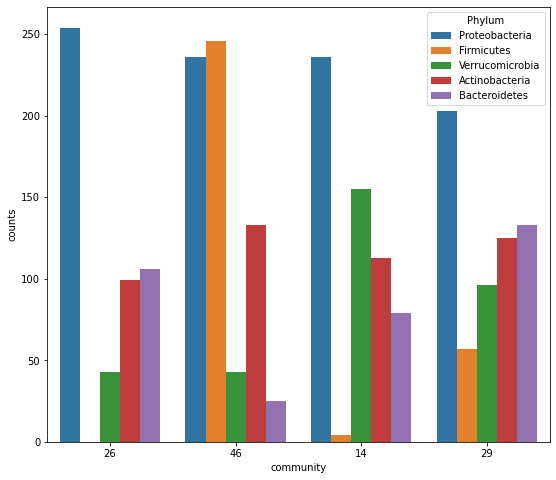

In [1044]:
plt.figure(figsize=(9, 8))
sns.barplot(data=draw_amazind, x="community", y = "counts", hue="Phylum")

In [17]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 13))
# sns.barplot(data=todraw2, x="mode", y = "counts", hue="community")


sns.barplot(x = 'community', y = 'Proteobacteria', data = draws3, color = 'violet')


NameError: name 'draws3' is not defined

<Figure size 576x936 with 0 Axes>

In [ ]:
sns.catplot(data=todraw2, hue="Phylum", x = "mode")

In [19]:
draw_max

NameError: name 'draw_max' is not defined